In [1]:
import os
%pwd
os.chdir("../")
%pwd

'C:\\Users\\Akash R\\OneDrive\\Desktop\\Projectts\\End-to-End-Diamond-Price-Prediction'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'artifacts/data_ingestion/diamonds.csv')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
49995,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
49996,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
49997,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
49998,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## Data Preprocessing

In [4]:
df.shape

(50000, 10)

In [5]:
#Checking the null values and datatypes of every column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


In [6]:
#Checking descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,50000.0,0.799444,0.475173,0.2,0.40,0.70,1.04,5.01
depth,50000.0,61.753006,1.431088,43.0,61.00,61.80,62.50,79.00
table,50000.0,57.457830,2.232092,43.0,56.00,57.00,59.00,95.00
price,50000.0,3944.805440,3997.938105,326.0,951.00,2410.00,5351.00,18823.00
x,50000.0,5.734403,1.123077,0.0,4.71,5.70,6.54,10.74
y,50000.0,5.737956,1.145579,0.0,4.72,5.71,6.54,58.90
z,50000.0,3.541056,0.707065,0.0,2.91,3.53,4.04,31.80


In [7]:
#Checking descriptive statistics for categorical variables
df.describe(include='object').T

,count,unique,top,freq
cut,50000,5,Ideal,19938
color,50000,7,G,10452
clarity,50000,8,SI1,12115


In [8]:
#values count of categorical variables and also we can confirm there are no garbage values
for col in df.select_dtypes(include='object').columns:
    print(f'\033[1m{col}: \033[0m')
    print(df[col].value_counts())
    print('*' * 70)

cut: 
Ideal        19938
Premium      12806
Very Good    11204
Good          4557
Fair          1495
Name: cut, dtype: int64
**********************************************************************
color: 
G    10452
E     9085
F     8864
H     7711
D     6224
I     5058
J     2606
Name: color, dtype: int64
**********************************************************************
clarity: 
SI1     12115
VS2     11404
SI2      8519
VS1      7579
VVS2     4694
VVS1     3369
IF       1632
I1        688
Name: clarity, dtype: int64
**********************************************************************


In [9]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [10]:
df.nunique()

carat        272
cut            5
color          7
clarity        8
depth        181
table        126
price      11297
x            553
y            551
z            371
dtype: int64

## Exploratory Data Analysis(EDA)

In [11]:
# sns.histplot(df['price'], bins=20)

In [12]:
# sns.histplot(df['carat'], bins=20)

Most of the diamonds are less than 1 carat in weight

In [13]:
# sns.histplot(df['table'],bins=20)
# plt.title('Table')
# plt.show()

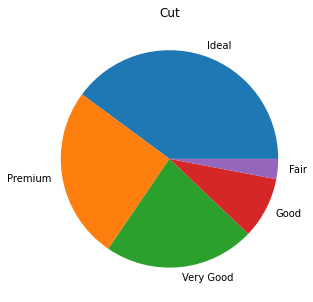

In [14]:
plt.figure(figsize=(5,5))
plt.pie(df['cut'].value_counts(),labels=['Ideal','Premium','Very Good','Good','Fair'])
plt.title('Cut')
plt.show()

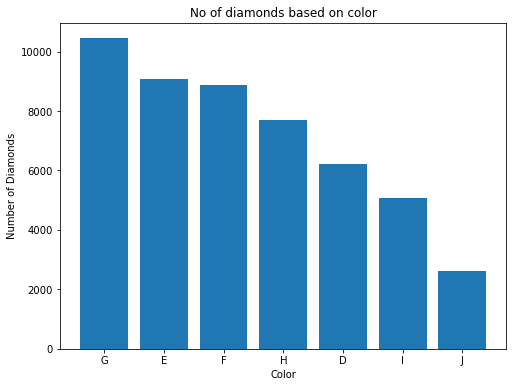

In [15]:
plt.figure(figsize=(8,6))
plt.bar(df['color'].value_counts().index, df['color'].value_counts())
plt.title('No of diamonds based on color')
plt.xlabel('Color')
plt.ylabel('Number of Diamonds')
plt.show()

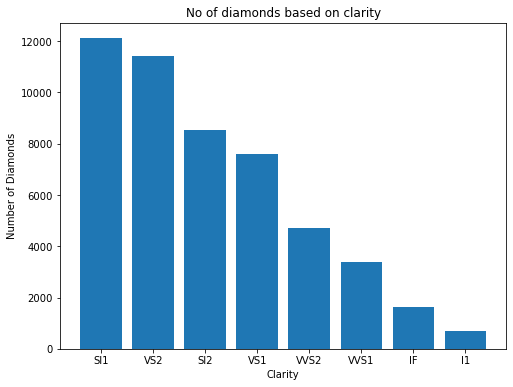

In [16]:
plt.figure(figsize=(8,6))
plt.bar(df['clarity'].value_counts().index, df['clarity'].value_counts())
plt.title('No of diamonds based on clarity')
plt.xlabel('Clarity')
plt.ylabel('Number of Diamonds')
plt.show()

### Comparing Diamond's features with Price


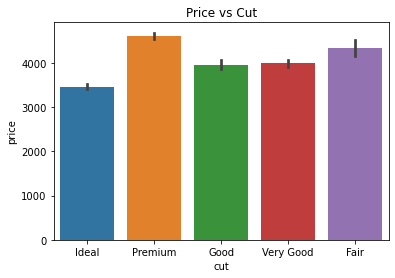

In [17]:
sns.barplot(data=df, x='cut', y='price')
plt.title('Price vs Cut')
plt.show()

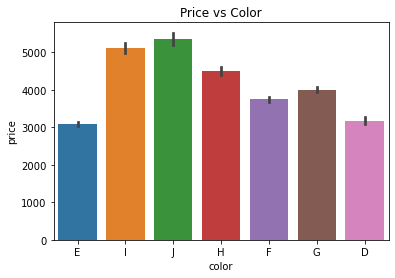

In [18]:
sns.barplot(data=df, x='color', y='price')
plt.title('Price vs Color')
plt.show()

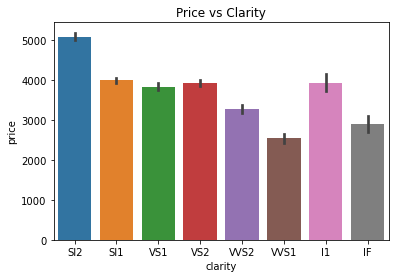

In [19]:
sns.barplot(data=df, x='clarity', y='price')
plt.title('Price vs Clarity')
plt.show()

## Data Preprocessing 2


In [20]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
49995,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
49996,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
49997,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
49998,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [21]:
from sklearn.preprocessing import LabelEncoder

for col in df.select_dtypes(include='object').columns:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])
    print(f"{col}: {df[col].unique()}")

cut: [2 3 1 4 0]
color: [1 5 6 4 2 3 0]
clarity: [3 2 4 5 7 6 0 1]


In [22]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
49995,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
49996,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
49997,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
49998,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


In [23]:
#changing categorical variables to numerical variables
# df['cut'] = df['cut'].map({'Ideal':5,'Premium':4,'Very Good':3,'Good':2,'Fair': 1})
# df['color'] = df['color'].map({'D':7,'E':6,'F':5,'G':4,'H':3,'I':2,'J':1})
# df['clarity'] = df['clarity'].map({'IF':8,'VVS1':7,'VVS2':6,'VS1':5,'VS2':4,'SI1':3,'SI2':2,'I1':1})

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  int32  
 2   color    50000 non-null  int32  
 3   clarity  50000 non-null  int32  
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int32(3), int64(1)
memory usage: 3.2 MB


In [25]:
for col in ['cut', 'color', 'clarity']:
    print(f'\033[1m{col}: \033[0m')
    print(df[col].value_counts())
    print('*' * 70)

cut: 
2    19938
3    12806
4    11204
1     4557
0     1495
Name: cut, dtype: int64
**********************************************************************
color: 
3    10452
1     9085
2     8864
4     7711
0     6224
5     5058
6     2606
Name: color, dtype: int64
**********************************************************************
clarity: 
2    12115
5    11404
3     8519
4     7579
7     4694
6     3369
1     1632
0      688
Name: clarity, dtype: int64
**********************************************************************


In [43]:
# for col in df.select_dtypes(include='number').columns:
#     sns.boxplot(df[col])
#     plt.show()

### Coorelation

In [26]:
#coorelation matrix
df.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,0.015933,0.291530,-0.215337,0.027734,0.183639,0.921804,0.975037,0.950035,0.952700
cut,0.015933,1.000000,0.001093,0.030531,-0.199106,0.150916,0.039873,0.021001,0.026202,0.000546
color,0.291530,0.001093,1.000000,-0.027277,0.047426,0.027513,0.172629,0.270529,0.263395,0.268388
clarity,-0.215337,0.030531,-0.027277,1.000000,-0.055250,-0.086640,-0.072434,-0.226871,-0.218385,-0.225797
depth,0.027734,-0.199106,0.047426,-0.055250,1.000000,-0.293012,-0.012731,-0.025563,-0.029809,0.094337
table,0.183639,0.150916,0.027513,-0.086640,-0.293012,1.000000,0.129848,0.197198,0.185248,0.153161
price,0.921804,0.039873,0.172629,-0.072434,-0.012731,0.129848,1.000000,0.884919,0.864393,0.860963
x,0.975037,0.021001,0.270529,-0.226871,-0.025563,0.197198,0.884919,1.000000,0.972977,0.970122
y,0.950035,0.026202,0.263395,-0.218385,-0.029809,0.185248,0.864393,0.972977,1.000000,0.950030
z,0.952700,0.000546,0.268388,-0.225797,0.094337,0.153161,0.860963,0.970122,0.950030,1.000000


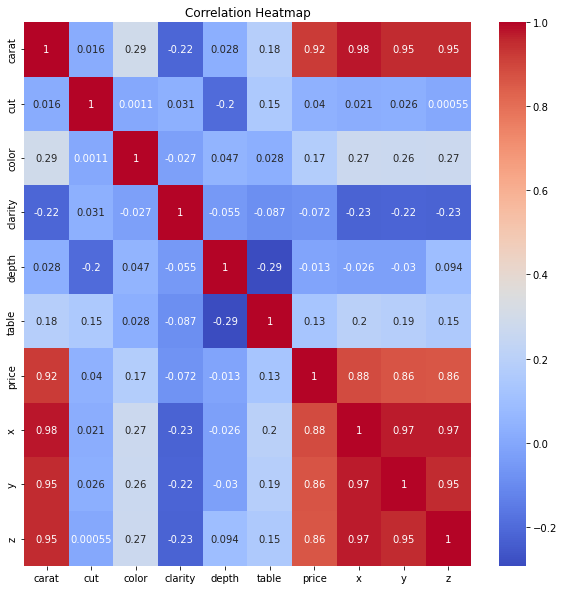

In [27]:
#plotting the correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Ploting the relationship between Price and Carat

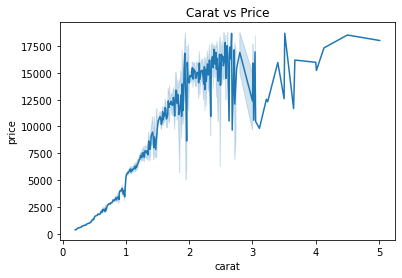

In [28]:
sns.lineplot(x='carat',y='price',data=df)
plt.title('Carat vs Price')
plt.show()

From the line plot it is quite clear that the price of the diamond increases with the increase in the carat of the diamond.

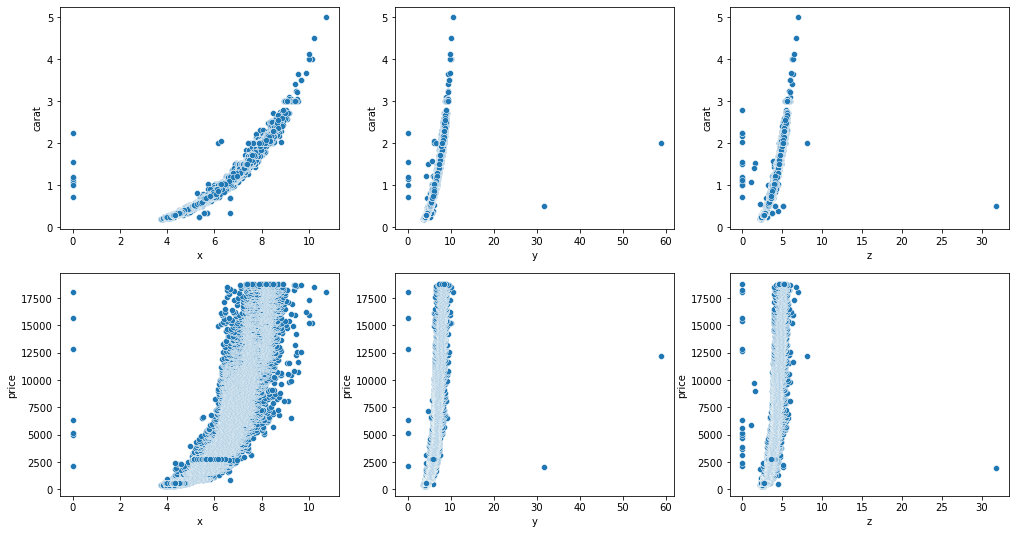

In [29]:
fig, ax = plt.subplots(2,3,figsize=(17,9))
sns.scatterplot(x='x',y='carat',data=df, ax=ax[0,0])
sns.scatterplot(x='y',y='carat',data=df, ax=ax[0,1])
sns.scatterplot(x='z',y='carat',data=df, ax=ax[0,2])
sns.scatterplot(x='x',y='price',data=df, ax=ax[1,0])
sns.scatterplot(x='y',y='price',data=df, ax=ax[1,1])
sns.scatterplot(x='z',y='price',data=df, ax=ax[1,2])
plt.show()

Majority of the diamonds have x values between 4 and 8, y values between 4 and 10 and
z values between 2 and 6. Diamonds with other dimensions are very rare.


# Train Test Split


In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop('price',axis=1),df['price'], test_size=0.25)

# Model Building


## Decision Tree Regressor

In [31]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt

DecisionTreeRegressor()

In [32]:
#training the model
dt.fit(x_train,y_train)
#train accuracy
dt.score(x_train,y_train)

0.9999977936295938

In [33]:
#predicting the test set
dt_pred = dt.predict(x_test)

## Random Forest Regressor


In [34]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf

RandomForestRegressor()

In [35]:
#training the model
rf.fit(x_train,y_train)
#train accuracy
rf.score(x_train,y_train)

0.9973573638929903

In [36]:
#predicting the test set
rf_pred = rf.predict(x_test)

# Model Evaluation


In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Decision Tree Regressor

In [38]:
print('Decision Tree Regressor Accuracy:',dt.score(x_test,y_test))
print('Decision Tree Regressor RMSE:', np.sqrt(mean_squared_error(y_test,dt_pred)))
print('Decision Tree Regressor MAE:', mean_absolute_error(y_test,dt_pred))

Decision Tree Regressor Accuracy: 0.9637643218463161
Decision Tree Regressor RMSE: 757.3114995693649
Decision Tree Regressor MAE: 368.40468


### Random Forest Regressor

In [89]:
print('Random Forest Regressor Accuracy:',rf.score(x_test,y_test))
print('Random Forest Regressor RMSE:',np.sqrt(mean_squared_error(y_test,rf_pred)))
print('Random Forest Regressor MAE:',mean_absolute_error(y_test,rf_pred))

Random Forest Regressor Accuracy: 0.9784720514116624
Random Forest Regressor RMSE: 587.952699383018
Random Forest Regressor MAE: 299.9751746785185


In [39]:
print('Random Forest Regressor Accuracy:',rf.score(x_test,y_test))
print('Random Forest Regressor RMSE:',np.sqrt(mean_squared_error(y_test,rf_pred)))
print('Random Forest Regressor MAE:',mean_absolute_error(y_test,rf_pred))

Random Forest Regressor Accuracy: 0.9807154942786801
Random Forest Regressor RMSE: 552.4724305075446
Random Forest Regressor MAE: 273.4312797685714


# Conclusion

Both the models have almost same accuracy. However, the Random Forest Regressor
model is slightly better than the Decision Tree Regressor model.